In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


# Pre-Funciones

In [2]:
import graphviz, IPython
import matplotlib.lines as lines
from matplotlib.ticker import FuncFormatter
from sklearn.tree import export_graphviz

def draw_tree(tree, df):
    s = export_graphviz(tree, out_file=None, feature_names=df.columns, filled=True)
    return graphviz.Source(s)

In [3]:
from sklearn import metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

def metricas(y_train,y_pred_train,y_test,y_pred_test):
    valores=y.value_counts().index.to_list()
    
    # Matriz de confusion: Train
    cm_train=metrics.confusion_matrix(y_train,y_pred_train,labels=valores)
    df_cm=pd.DataFrame(cm_train,index=valores,columns=valores)
    plt.figure(figsize=(8,5))
    sns.heatmap(df_cm,annot=True,cmap="YlGnBu")
    plt.title('Matriz de Confusión: Train')
    plt.xlabel('Predicción')
    plt.ylabel('Valores Reales')
    plt.show()
    
    # Matriz de confusion: Test
    cm_test=metrics.confusion_matrix(y_test,y_pred_test,labels=valores)
    df_cm=pd.DataFrame(cm_test,index=valores,columns=valores)
    plt.figure(figsize=(8,5))
    sns.heatmap(df_cm,annot=True,cmap="YlGnBu")
    plt.title('Matriz de Confusión: Test')
    plt.xlabel('Predicción')
    plt.ylabel('Valores Reales')
    plt.show()
    
    accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    precision_train=metrics.precision_score(y_train,y_pred_train,average='micro')
    precision_test=metrics.precision_score(y_test,y_pred_test,average='micro')
    recall_train=metrics.recall_score(y_train,y_pred_train,average='micro')
    recall_test=metrics.recall_score(y_test,y_pred_test,average='micro')
    f_score=f1_score(y_test,y_pred_test,average='micro')
    
    train = (accuracy_train*100, precision_train*100, recall_train*100)
    test = (accuracy_test*100, precision_test*100, recall_test*100)

    ind = np.arange(3)  # the x locations for the groups
    ind_n = np.arange(4)  # the x locations for the groups
    width = 0.3       # the width of the bars
    
    fig = plt.figure(figsize = (8,5))
    ax = fig.add_subplot(111)
    
    rects1 = ax.bar(ind, train, width, color='r')
    rects2 = ax.bar(ind+width, test, width, color='g')
    rects3 = ax.bar(3, f_score*100, width, color='b')
    
    ax.set_ylabel('Scores')
    ax.set_xticks(ind_n + width/2)
    ax.set_xticklabels( ('Accuracy', 'Precisión', 'Recall', 'F1 Score') )
    ax.legend( (rects1[0], rects2[0]), ('Train', 'Test') )
    
    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%.3f'%round(h,3),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    plt.title('Puntajes')
    plt.ylim(0,120)
    plt.show()
    
    return 

# Cargando Datos

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [5]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 1. Análisis Exploratorio de Datos

In [6]:
print("Tenemos ",len(df.columns.to_list())," características")
print()
print(df.columns.to_list())

Tenemos  23  características

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


Todas nuestras variables son categóricas, esto es favorable para un Random Forest y Catboosting.

In [7]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

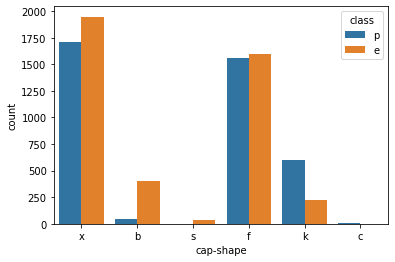

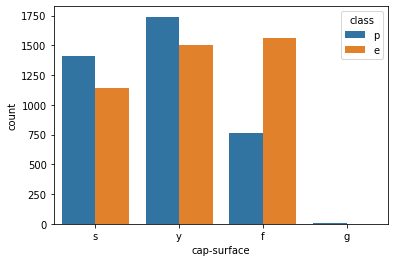

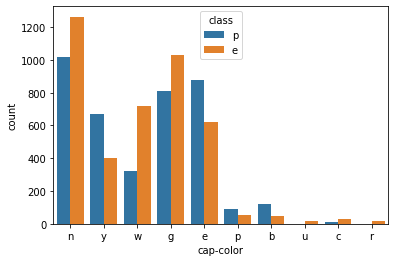

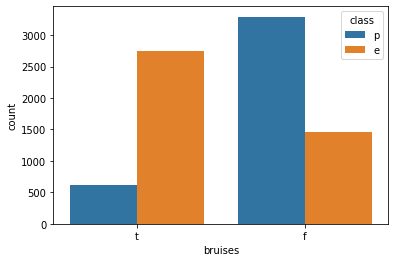

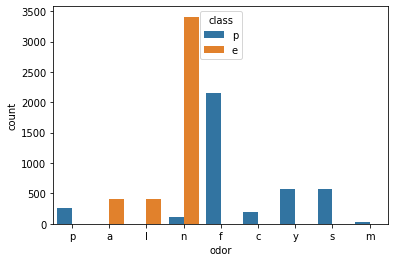

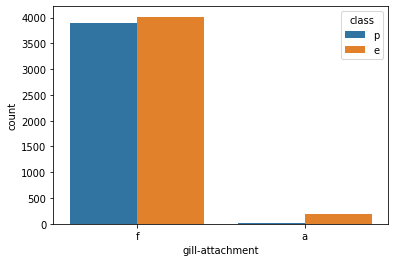

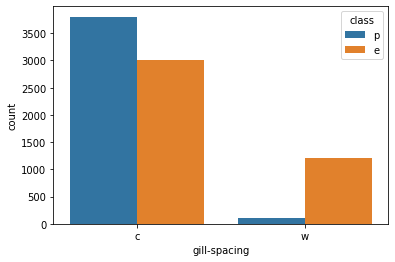

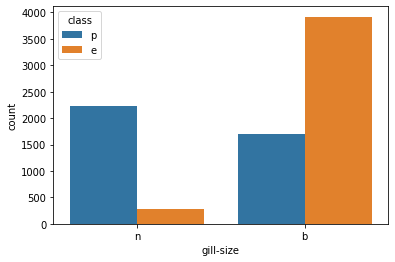

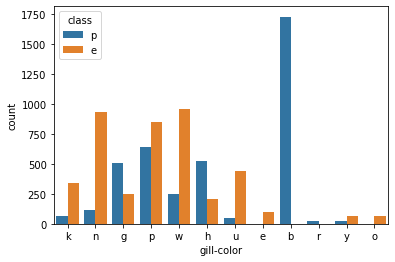

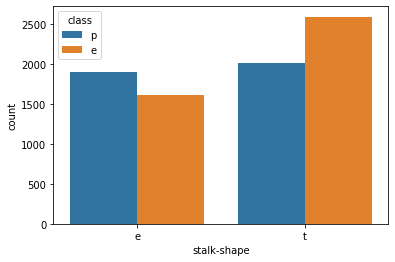

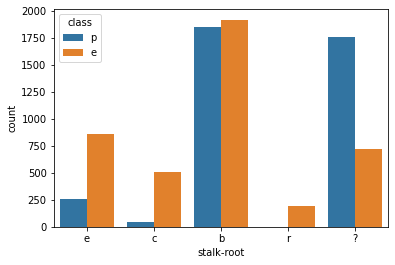

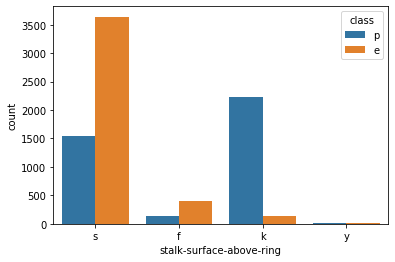

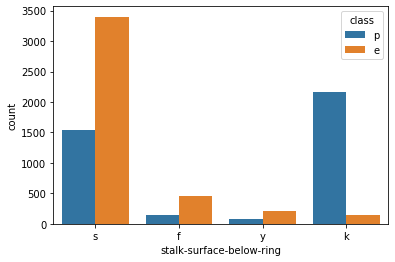

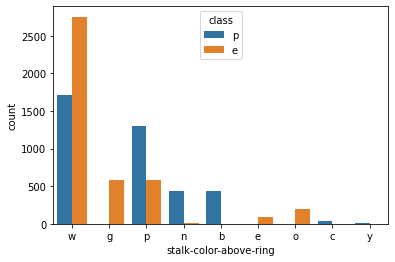

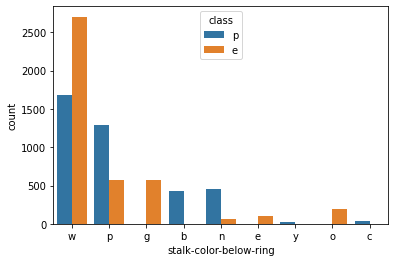

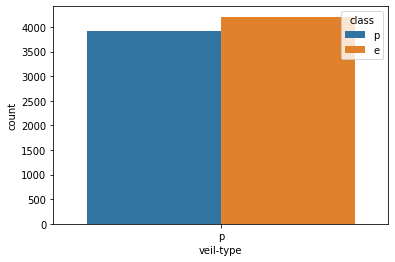

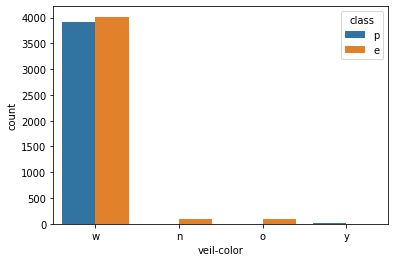

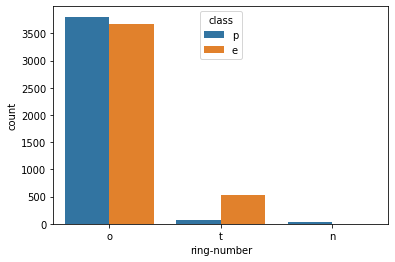

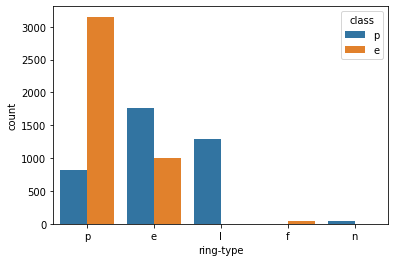

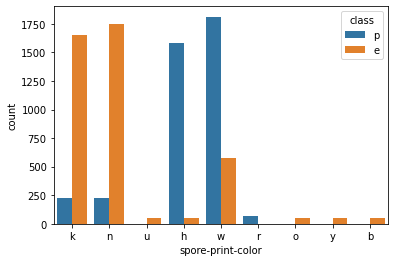

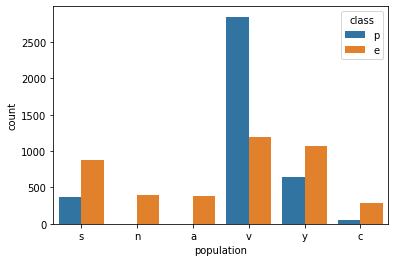

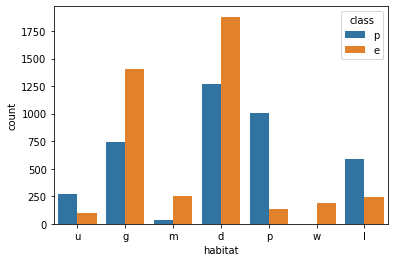

In [8]:
#print(df.columns.to_list())
for i in df.drop('class',axis=1).columns.to_list():
    sns.countplot(x=i, data=df, hue='class')
    plt.show()

# 2. Limpieza de Datos

## 2.1. Datos Nulos

El DataFrame no contiene datos nulos.

In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## 2.2. Datos irrelevantes

### veil-type

Vemos que la variables solo contiene un valor, por lo que ya que todas las filas están categorizadas de esta forma, no aporta ninguna información

In [10]:
df['veil-type'].unique()

array(['p'], dtype=object)

In [11]:
df_clean = df.drop('veil-type',axis=1).copy()

# 3. Ingeniería de Datos

## 3.1. Selección de Características

### Filter Method -> Chi-Squared

In [12]:
from scipy.stats import chi2_contingency

for i in df_clean.columns.to_list():
    crossTab = pd.crosstab(index=df_clean['class'], columns=df[i])
    crossTab
    
    print(i)

    stat, p, dof, expected = chi2_contingency([crossTab.iloc[0].values,crossTab.iloc[1].values])# select significance value
    alpha = 0.05# Determine whether to reject or keep your null hypothesis
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Las variables están asociadas(Se rechaza H0)')
    else:
        print('Las variables no están asociadas(No se rechaza H0)')

class
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)
cap-shape
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)
cap-surface
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)
cap-color
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)
bruises
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)
odor
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)
gill-attachment
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)
gill-spacing
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)
gill-size
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)
gill-color
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)
stalk-shape
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)
stalk-root
significance=0.050, p=0.000
Las variables están asociadas(Se rechaza H0)


## 3.2. Conversión de Características a numéricas

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_final_label = pd.DataFrame()

for i in df_clean.columns.to_list():
    le.fit(df_clean[i])
    df_final_label[i] = le.transform(df_clean[i])

df_final_label.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# 4. Entrenamiento y Validación

In [14]:
X = df_final_label.drop('class', axis=1)
y = df_final_label['class']

## 4.1. Partición Muestral

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [16]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7529,0,2,3,0,5,1,1,0,7,0,...,1,2,7,7,2,2,4,7,2,1
6531,3,3,4,0,2,1,0,1,0,1,...,2,1,6,7,2,1,0,7,4,0
7242,3,2,4,0,8,1,0,1,0,1,...,2,1,6,6,2,1,0,7,4,2
1336,5,2,4,0,5,1,1,0,7,1,...,2,0,7,7,2,1,0,3,0,1
2211,5,3,4,1,5,1,0,0,7,1,...,2,2,3,6,2,1,4,3,5,0


## 4.2. Algoritmos de Machine Learning

### Árbol de Decisión

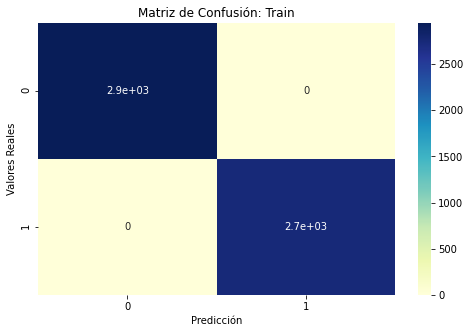

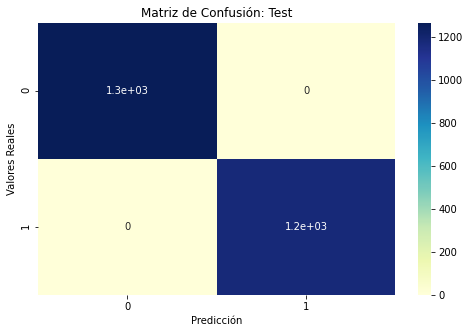

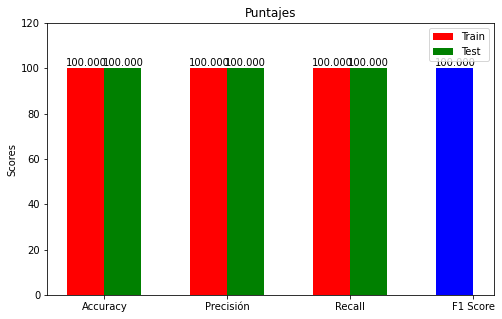

In [17]:
from sklearn.tree import DecisionTreeClassifier
arbolDecision = DecisionTreeClassifier()
arbolDecision.fit(X_train, y_train)
y_pred_train = arbolDecision.predict(X_train)
y_pred_test = arbolDecision.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)

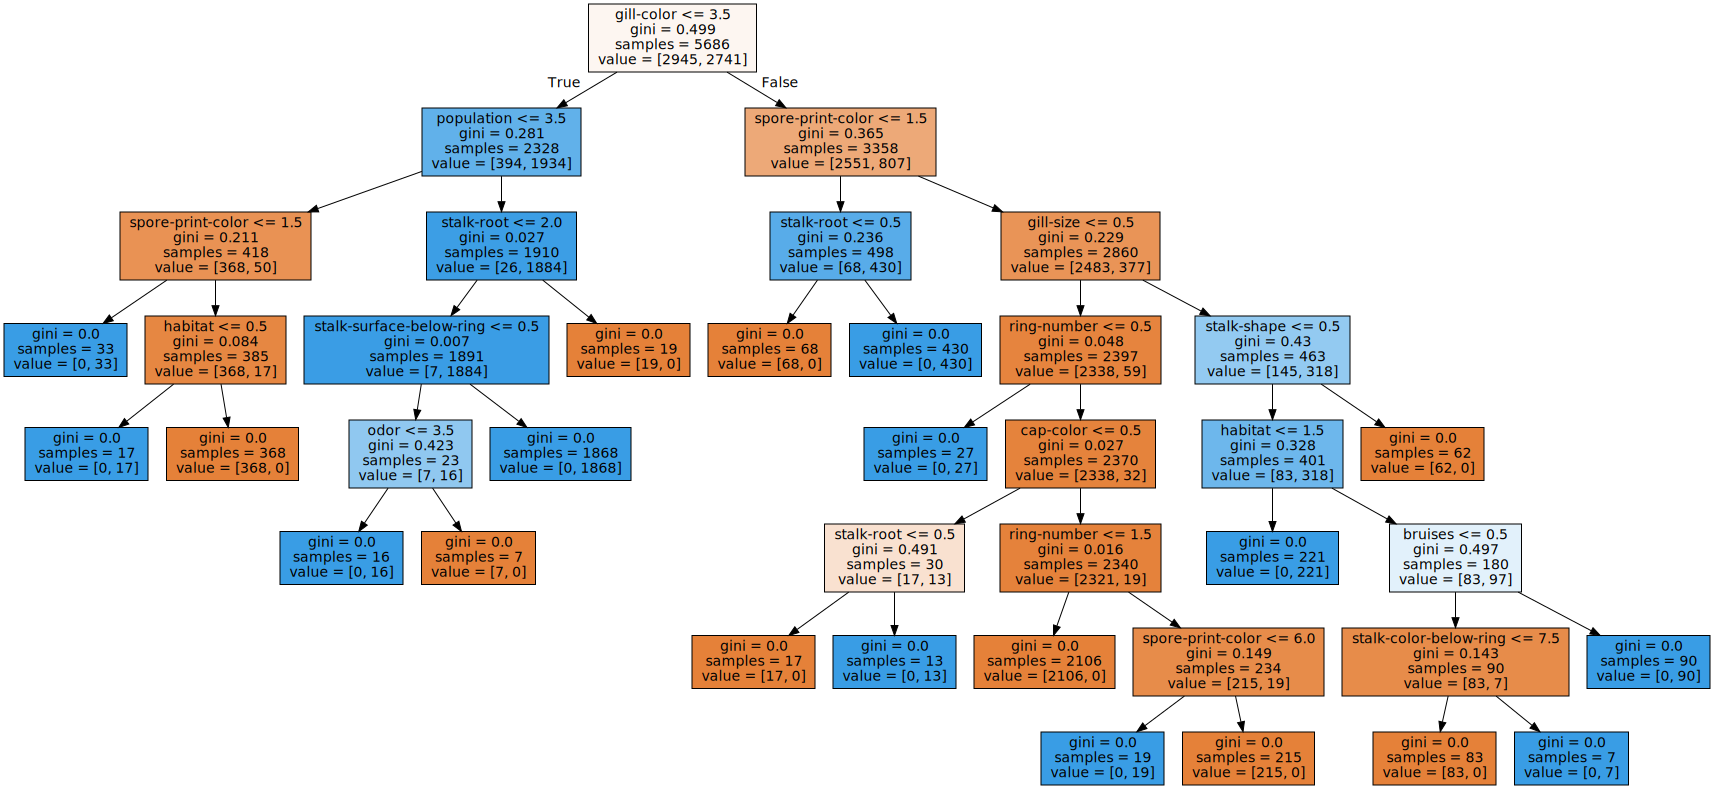

In [18]:
draw_tree(arbolDecision, X_train)

Learning rate set to 0.021639
0:	learn: 0.6371899	total: 57.5ms	remaining: 57.5s
1:	learn: 0.5768852	total: 61.2ms	remaining: 30.5s
2:	learn: 0.5330180	total: 64.7ms	remaining: 21.5s
3:	learn: 0.4979443	total: 68.2ms	remaining: 17s
4:	learn: 0.4613953	total: 71.5ms	remaining: 14.2s
5:	learn: 0.4259058	total: 74.8ms	remaining: 12.4s
6:	learn: 0.3848079	total: 78.2ms	remaining: 11.1s
7:	learn: 0.3442574	total: 81.6ms	remaining: 10.1s
8:	learn: 0.3100375	total: 84.9ms	remaining: 9.35s
9:	learn: 0.2789398	total: 88.2ms	remaining: 8.73s
10:	learn: 0.2557784	total: 91.5ms	remaining: 8.22s
11:	learn: 0.2381042	total: 94.7ms	remaining: 7.8s
12:	learn: 0.2218356	total: 98.1ms	remaining: 7.44s
13:	learn: 0.2075009	total: 101ms	remaining: 7.14s
14:	learn: 0.1947323	total: 105ms	remaining: 6.88s
15:	learn: 0.1806935	total: 108ms	remaining: 6.64s
16:	learn: 0.1713567	total: 112ms	remaining: 6.45s
17:	learn: 0.1578242	total: 115ms	remaining: 6.28s
18:	learn: 0.1442526	total: 118ms	remaining: 6.11s
1

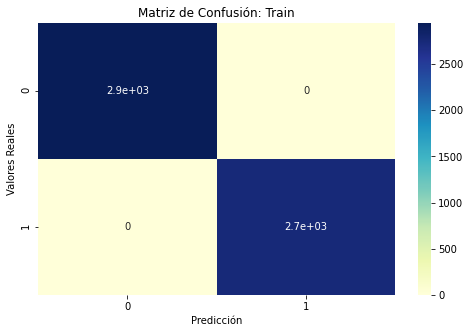

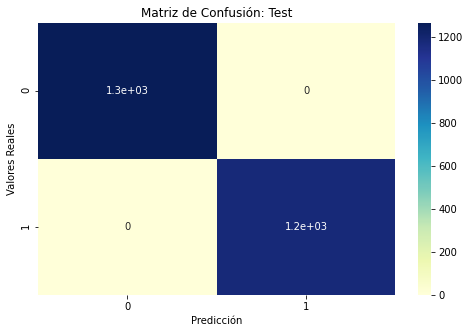

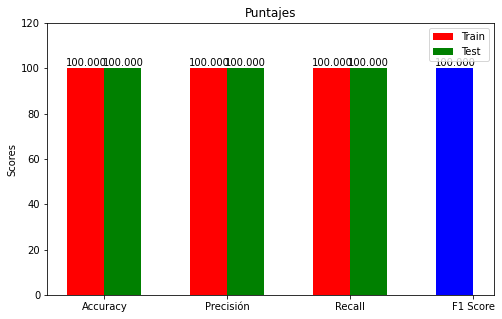

In [19]:
from catboost import CatBoostClassifier
catBoost = CatBoostClassifier()
catBoost.fit(X_train, y_train)
y_pred_train = catBoost.predict(X_train)
y_pred_test = catBoost.predict(X_test)
metricas(y_train,y_pred_train,y_test,y_pred_test)

# Conclusiones

Tenemos dos potentes algoritmos, pero ¿Cuál debemos elegir? Si bien los dos nos brindan potentes puntajes, con el CatBoost al ser un algoritmo complejo, perdemos interpretabilidad, pero con el árbol de decisión obtenemos interpretabilidad, osea podemos saber como se llego al resultado de predecir un hongo venenoso de un hongo comestible.